# Getting data from the web:  Scraping

Our trusty friend Pandas can read data directly from a web link.

We read the dataset into a dataframe without actually having the file in our folder!

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/classics/classics.csv')

In [6]:
df.sample()

,bibliography.congress classifications,bibliography.languages,bibliography.subjects,bibliography.title,bibliography.type,metadata.downloads,metadata.id,metadata.rank,metadata.url,bibliography.author.birth,...,metrics.sentiments.polarity,metrics.sentiments.subjectivity,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
758,PZ,en,"Fantasy,Goblins -- Juvenile fiction,Fairy tale...",The Princess and the Goblin,Text,531,708,759,https://www.gutenberg.org/ebooks/708,1824,...,0.098936,0.503965,4.57,16.0,0.06,233013,604,3017,64576.8,50951


<AxesSubplot:ylabel='bibliography.title'>

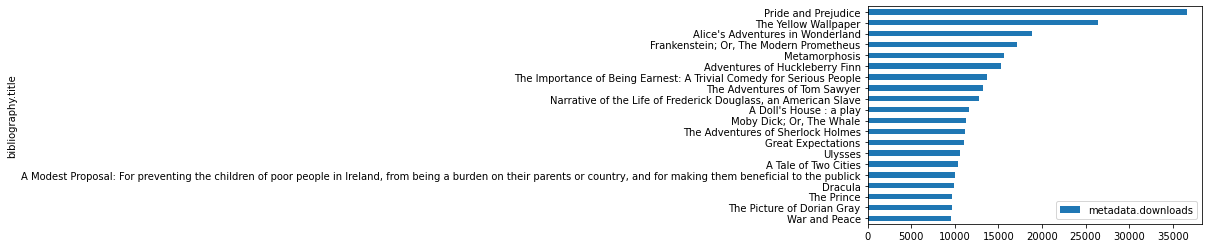

In [12]:
df.sort_values(by='metadata.downloads',ascending=True)[-20:].plot.barh(x='bibliography.title',y='metadata.downloads')

---

## requests

The above code is very handy, but what if we simply want to read content that is on the page rather than in a readily available file?

Go to the [Classics CSV File](https://corgis-edu.github.io/corgis/csv/classics/) webpage and use your Browser's Inspector to look at the HTML for the page.  This will show HTML we discussed very briefly during Week 1.

We are going to get the entire web page using "requests" ([documentation](https://docs.python-requests.org/en/latest/)).  
* "Requests is an elegant and simple HTTP library for Python, built for human beings."

In [43]:
import requests

In [44]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/classics/')

In [45]:
response

<Response [200]>

"Responses" are numerical codes that indicate whether a specific HTTP request has been successfully completed (See [HTTP code list](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status))

You may have run into a couple of these on other sites, or even while trying to login to this JupyterHub!

In [46]:
# Note that this won't actually get the csv file

response = requests.get('https://corgis-edu.github.io/corgis/csv/classics/classics.csv')

In [47]:
response

<Response [404]>

Try finding the above URL in your browser:  https://corgis-edu.github.io/corgis/csv/classics/classics.csv

In [48]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/classics/')
print(response)

<Response [200]>


In [49]:
# The html of our desired corgis page:
response.text

'<!DOCTYPE html>\n<html lang="en-US">\n    <head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n\n    \n    \n\n    <title>CORGIS Datasets Project</title>\n    <meta name="description" content="\n\n\n\n\n\n\n            Github Pages for CORGIS Datasets Project">\n    <link rel="canonical" href="https://corgis-edu.github.io//corgis/csv/classics/">\n\n    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">\n    <link rel="stylesheet" href="https://code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">\n    <link rel="stylesheet" href="/corgis/assets/css/main.css">\n\n    \n\n    \n        <link rel="stylesheet" href="/corgis/assets/css/pygments.css">\n\n        <style>\n            .ui-dialog-titlebar-close {\n                padding: 0 !important;\n            }\n\n            .ui-dialog-titlebar-close:af

In [50]:
print(response.text)

<!DOCTYPE html>
<html lang="en-US">
    <head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    
    

    <title>CORGIS Datasets Project</title>
    <meta name="description" content="






            Github Pages for CORGIS Datasets Project">
    <link rel="canonical" href="https://corgis-edu.github.io//corgis/csv/classics/">

    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">
    <link rel="stylesheet" href="https://code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">
    <link rel="stylesheet" href="/corgis/assets/css/main.css">

    

    
        <link rel="stylesheet" href="/corgis/assets/css/pygments.css">

        <style>
            .ui-dialog-titlebar-close {
                padding: 0 !important;
            }

            .ui-dialog-titlebar-close:after {
                content: '';
 

It is possible to search through the web tags to find what it may be that you want to search for:

In [54]:
# Save all the html in a string variable
html_string = response.text

# Use BeautifulSoup to create a new object that will allow you to search for HTML tags
document = BeautifulSoup(html_string, "html.parser")

# This "document" variable is an object that has a "find" method
document.find('a')

<a href="mailto:acbart@vt.edu">acbart@vt.edu</a>

What is `<a href="...`?

-> This is an HTML tag.... so what are HTML "tags"?

HTML: Hyper-Text Markup Language

HTML uses "tags" to classify different elements, for example:
* `<h1>...</h1>`: a large header
* `<img src="...">`: an image
* `<a href="...">Deep Space Nine</a>`: a link

Let's look at a simpler website:
http://static.decontextualize.com/kittens.html

In [69]:
response = requests.get('http://static.decontextualize.com/kittens.html')

In [70]:
print(response.text)

<!doctype html>
<html>
	<head>
		<title>Kittens!</title>
		<style type="text/css">
			span.lastcheckup { font-family: "Courier", fixed; font-size: 11px; }
		</style>
	</head>
	<body>
		<h1>Kittens and the TV Shows They Love</h1>
		<div class="kitten">
			<h2>Fluffy</h2>
			<div><img src="http://placekitten.com/120/120"></div>
			<ul class="tvshows">
				<li>
					<a href="http://www.imdb.com/title/tt0106145/">Deep Space Nine</a>
				</li>
				<li>
					<a href="http://www.imdb.com/title/tt0088576/">Mr. Belvedere</a>
				</li>
			</ul>
			Last check-up: <span class="lastcheckup">2014-01-17</span>
		</div>
		<div class="kitten">
			<h2>Monsieur Whiskeurs</h2>
			<div><img src="http://placekitten.com/110/110"></div>
			<ul class="tvshows">
				<li>
					<a href="http://www.imdb.com/title/tt0106179/">The X-Files</a>
				</li>
				<li>
					<a href="http://www.imdb.com/title/tt0098800/">Fresh Prince</a>
				</li>
			</ul>
			Last check-up: <span class="lastcheckup">2013-11-02</span>
		</div

Here the tag examples are:
* `<h1>Kittens and the TV Shows They Love</h1>`: a large header
* `<img src="http://placekitten.com/120/120">`: an image
* `<a href="http://www.imdb.com/title/tt0106145/">Deep Space Nine</a>`: a link

And you'll see additional tags:
* `<ul>`: unordered list
* `<li>`: list item
* `<head>` and `<body>`: like header information and the body of a document
* `<div>`: section of the document

There's a lot to learn about HTML, but this is mainly to show you examples of tags.  BeautifulSoup will let you parse HTML documents based on these tags.

---

Fun aside:  you can use the IPython library to visualize HTML right inside the Jupyter notebook.

In [58]:
from IPython.core.display import HTML
HTML('<img src="http://placekitten.com/110/110">')

In [59]:
%%HTML
<img src="http://placekitten.com/110/110">

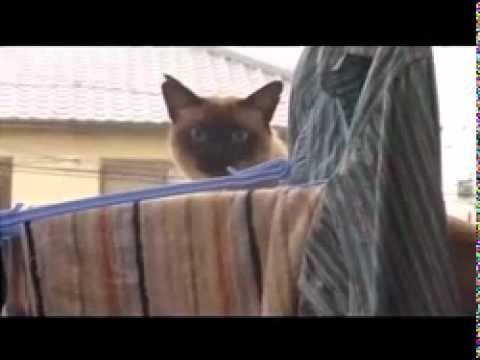

In [68]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('Awf45u6zrP0')

---

Ok, enough cat silliness...

---

Back to our literary classics.

In [71]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/classics/')
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")

In [73]:
# We can look for the first link:

document.find('a')

<a href="mailto:acbart@vt.edu">acbart@vt.edu</a>

In [74]:
# We can search for all the links on the page with:

document.find_all('a')

[<a href="mailto:acbart@vt.edu">acbart@vt.edu</a>,
 <a href="https://www.gutenberg.org/ebooks/search/?sort_order=downloads">https://www.gutenberg.org/ebooks/search/?sort_order=downloads</a>,
 <a download="" href="../../datasets/csv/classics/classics.csv">classics.csv <span class="fas fa-download"></span></a>,
 <a href="http://www.gutenberg.org/ebooks/110">http://www.gutenberg.org/ebooks/110</a>]

This allows us now to find the download link for the csv file.

# Two examples for practice

### Getting the script of Coco from IMSDB

In [14]:
import requests

In [15]:
response = requests.get('https://imsdb.com/scripts/Coco.html')

In [16]:
response

<Response [200]>

In [17]:
response.text

'<html>\r\n<head><meta name="viewport" content="width=device-width, initial-scale=1" />\r\n<meta name="HandheldFriendly" content="true">\r\n<meta http-equiv="content-type" content="text/html; charset=iso-8859-1">\r\n<meta http-equiv="Content-Language" content="EN">\r\n\r\n<meta name=objecttype CONTENT=Document>\r\n<meta name=ROBOTS CONTENT="INDEX, FOLLOW">\r\n<meta name=Subject CONTENT="Movie scripts, Film scripts">\r\n<meta name=rating CONTENT=General>\r\n<meta name=distribution content=Global>\r\n<meta name=revisit-after CONTENT="2 days">\r\n\r\n<link href="/style.css" rel="stylesheet" type="text/css">\r\n\r\n<script type="text/javascript">\r\n  var _gaq = _gaq || [];\r\n  _gaq.push([\'_setAccount\', \'UA-3785444-3\']);\r\n  _gaq.push([\'_trackPageview\']);\r\n\r\n  (function() {\r\n    var ga = document.createElement(\'script\'); ga.type = \'text/javascript\'; ga.async = true;\r\n    ga.src = (\'https:\' == document.location.protocol ? \'https://ssl\' : \'http://www\') + \'.google-a

Woah, too much!

We break it down with BeautifulSoup

In [19]:
from bs4 import BeautifulSoup

In [20]:
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")

In [21]:
document

<html>
<head><meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="true" name="HandheldFriendly"/>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="EN" http-equiv="Content-Language"/>
<meta content="Document" name="objecttype"/>
<meta content="INDEX, FOLLOW" name="ROBOTS"/>
<meta content="Movie scripts, Film scripts" name="Subject"/>
<meta content="General" name="rating"/>
<meta content="Global" name="distribution"/>
<meta content="2 days" name="revisit-after"/>
<link href="/style.css" rel="stylesheet" type="text/css"/>
<script type="text/javascript">
  var _gaq = _gaq || [];
  _gaq.push(['_setAccount', 'UA-3785444-3']);
  _gaq.push(['_trackPageview']);

  (function() {
    var ga = document.createElement('script'); ga.type = 'text/javascript'; ga.async = true;
    ga.src = ('https:' == document.location.protocol ? 'https://ssl' : 'http://www') + '.google-analytics.com/ga.js';
    var s = document.getElementsByTagName('s

`document` itself is still the original HTML

In [22]:
type(document)

bs4.BeautifulSoup

In [23]:
document.find('pre')

<pre>



<b>                               COCO
</b>



                         Original story by

       Lee Unkrich, Jason Katz, Matthew Aldrich &amp; Adrian Molina


                          Screenplay by

                Adrian Molina &amp; Matthew Aldrich
<b>                                                                      1.
</b>

<b>      EXT. MARIGOLD PATH - DUSK
</b>
      A path of marigold petals leads up to an altar lovingly
      arranged in a humble cemetery. An old woman lights a candle
      as the smoke of burning copal wood dances lyrically upward...

<b>      CARD: DISNEY PRESENTS
</b>
<b>      CARD: A PIXAR ANIMATION STUDIOS FILM
</b>
      The smoke lifts up toward lines of papel picado �- cut paper
      banners -- that sway gently in the breeze.

<b>      PAPEL PICADO CARD: "COCO"
</b>
<b>                            MIGUEL (V.O.)
</b>                  Sometimes I think I'm cursed...
                  'cause of something that happened
                  befor

There is still a lot of formatting to work through, but we have now found the screenplay text.

In [33]:
print(document.find('pre').text)





                               COCO




                         Original story by

       Lee Unkrich, Jason Katz, Matthew Aldrich & Adrian Molina


                          Screenplay by

                Adrian Molina & Matthew Aldrich
                                                                      1.


      EXT. MARIGOLD PATH - DUSK

      A path of marigold petals leads up to an altar lovingly
      arranged in a humble cemetery. An old woman lights a candle
      as the smoke of burning copal wood dances lyrically upward...

      CARD: DISNEY PRESENTS

      CARD: A PIXAR ANIMATION STUDIOS FILM

      The smoke lifts up toward lines of papel picado �- cut paper
      banners -- that sway gently in the breeze.

      PAPEL PICADO CARD: "COCO"

                            MIGUEL (V.O.)
                  Sometimes I think I'm cursed...
                  'cause of something that happened
                  before I was even born.

      A story begins to play out on the pa

### Grabbing data from GitHub

Let's look at the repository lists of the Pandas-relevant organization

In [84]:
import requests

In [85]:
response = requests.get('https://github.com/orgs/pandas-dev/repositories')

In [86]:
response

<Response [200]>

In [87]:
html_string = response.text

In [88]:
html_string

'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="dark">\n  <head>\n    <meta charset="utf-8">\n  <link rel="dns-prefetch" href="https://github.githubassets.com">\n  <link rel="dns-prefetch" href="https://avatars.githubusercontent.com">\n  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">\n  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">\n  <link rel="preconnect" href="https://github.githubassets.com" crossorigin>\n  <link rel="preconnect" href="https://avatars.githubusercontent.com">\n\n\n\n  <link crossorigin="anonymous" media="all" integrity="sha512-dkuYFW+ra8yYSt342e5pJEeslPSjMcrMvNxlYZMyM/X+/WJHDPvoCuGq3LFojI7B0dQWwZNRiPMnbi9IfUgTaA==" rel="stylesheet" href="https://github.githubassets.com/assets/light-764b98156fab6bcc984addf8d9ee6924.css" /><link crossorigin="anonymous" media="all" integrity="sha512-UrAu23+eyncWvaQFwsLbgSKtmLb2aH1bcT4hJnnRdkaPuY1eu9bumt33FyHHFDX8hskTUNWNkIsMCz7F

In [89]:
from bs4 import BeautifulSoup

In [90]:
document = BeautifulSoup(html_string, "html.parser")

In [91]:
document


<!DOCTYPE html>

<html data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-764b98156fab6bcc984addf8d9ee6924.css" integrity="sha512-dkuYFW+ra8yYSt342e5pJEeslPSjMcrMvNxlYZMyM/X+/WJHDPvoCuGq3LFojI7B0dQWwZNRiPMnbi9IfUgTaA==" media="all" rel="stylesheet"><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-52b02edb7f9eca7716bda405c2c2db81.css" integrity="sha512-UrAu23+eyncWvaQFwsLbgSKtmLb2aH1bcT4

In [92]:
document.find("a")

<a class="px-2 py-4 color-bg-accent-emphasis color-fg-on-emphasis show-on-focus js-skip-to-content" href="#start-of-content">Skip to content</a>

In [93]:
document.find("a").attrs

{'href': '#start-of-content',
 'class': ['px-2',
  'py-4',
  'color-bg-accent-emphasis',
  'color-fg-on-emphasis',
  'show-on-focus',
  'js-skip-to-content']}

In [94]:
document.find("a", attrs={'itemprop':'name codeRepository'})

<a class="d-inline-block" data-hovercard-type="repository" data-hovercard-url="/pandas-dev/pandas/hovercard" data-view-component="true" href="/pandas-dev/pandas" itemprop="name codeRepository">
            pandas
</a>

In [95]:
document.find_all("a", attrs={'itemprop':'name codeRepository'})

[<a class="d-inline-block" data-hovercard-type="repository" data-hovercard-url="/pandas-dev/pandas/hovercard" data-view-component="true" href="/pandas-dev/pandas" itemprop="name codeRepository">
             pandas
 </a>,
 <a class="d-inline-block" data-hovercard-type="repository" data-hovercard-url="/pandas-dev/pandas-release/hovercard" data-view-component="true" href="/pandas-dev/pandas-release" itemprop="name codeRepository">
             pandas-release
 </a>,
 <a class="d-inline-block" data-hovercard-type="repository" data-hovercard-url="/pandas-dev/pandas-dev-flaker/hovercard" data-view-component="true" href="/pandas-dev/pandas-dev-flaker" itemprop="name codeRepository">
             pandas-dev-flaker
 </a>,
 <a class="d-inline-block" data-hovercard-type="repository" data-hovercard-url="/pandas-dev/pandas-governance/hovercard" data-view-component="true" href="/pandas-dev/pandas-governance" itemprop="name codeRepository">
             pandas-governance
 </a>,
 <a class="d-inline-bl

In [96]:
for i in document.find_all("a", attrs={'itemprop':'name codeRepository'}):
    print(i.text.strip())

pandas
pandas-release
pandas-dev-flaker
pandas-governance
pandas-blog
pandas-user-surveys
.github
pandas-binder
pandas-ci
pandas2
pandas-compat
parquet-compatibility


In [97]:
for i in document.find_all("a", attrs={'itemprop':'name codeRepository'}):
    print(i.attrs)

{'itemprop': 'name codeRepository', 'data-hovercard-type': 'repository', 'data-hovercard-url': '/pandas-dev/pandas/hovercard', 'href': '/pandas-dev/pandas', 'data-view-component': 'true', 'class': ['d-inline-block']}
{'itemprop': 'name codeRepository', 'data-hovercard-type': 'repository', 'data-hovercard-url': '/pandas-dev/pandas-release/hovercard', 'href': '/pandas-dev/pandas-release', 'data-view-component': 'true', 'class': ['d-inline-block']}
{'itemprop': 'name codeRepository', 'data-hovercard-type': 'repository', 'data-hovercard-url': '/pandas-dev/pandas-dev-flaker/hovercard', 'href': '/pandas-dev/pandas-dev-flaker', 'data-view-component': 'true', 'class': ['d-inline-block']}
{'itemprop': 'name codeRepository', 'data-hovercard-type': 'repository', 'data-hovercard-url': '/pandas-dev/pandas-governance/hovercard', 'href': '/pandas-dev/pandas-governance', 'data-view-component': 'true', 'class': ['d-inline-block']}
{'itemprop': 'name codeRepository', 'data-hovercard-type': 'repository',

In [98]:
for i in document.find_all("a", attrs={'itemprop':'name codeRepository'}):
    print(i.text.strip() + ' : accessible at http://github.com' + i.attrs['href'])

pandas : accessible at http://github.com/pandas-dev/pandas
pandas-release : accessible at http://github.com/pandas-dev/pandas-release
pandas-dev-flaker : accessible at http://github.com/pandas-dev/pandas-dev-flaker
pandas-governance : accessible at http://github.com/pandas-dev/pandas-governance
pandas-blog : accessible at http://github.com/pandas-dev/pandas-blog
pandas-user-surveys : accessible at http://github.com/pandas-dev/pandas-user-surveys
.github : accessible at http://github.com/pandas-dev/.github
pandas-binder : accessible at http://github.com/pandas-dev/pandas-binder
pandas-ci : accessible at http://github.com/pandas-dev/pandas-ci
pandas2 : accessible at http://github.com/pandas-dev/pandas2
pandas-compat : accessible at http://github.com/pandas-dev/pandas-compat
parquet-compatibility : accessible at http://github.com/pandas-dev/parquet-compatibility


### Ok, maybe three examples
The NYTimes has an organizational account on GitHub too:

In [100]:
response = requests.get('https://github.com/orgs/nytimes/repositories')
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")
for i in document.find_all("a", attrs={'itemprop':'name codeRepository'}):
    print(i.text.strip() + ' : accessible at http://github.com' + i.attrs['href'])

covid-19-data : accessible at http://github.com/nytimes/covid-19-data
three-loader-3dtiles : accessible at http://github.com/nytimes/three-loader-3dtiles
aframe-loader-3dtiles-component : accessible at http://github.com/nytimes/aframe-loader-3dtiles-component
three-story-controls : accessible at http://github.com/nytimes/three-story-controls
kyt : accessible at http://github.com/nytimes/kyt
httptest : accessible at http://github.com/nytimes/httptest
react-tracking : accessible at http://github.com/nytimes/react-tracking
rd-blender-docker : accessible at http://github.com/nytimes/rd-blender-docker
gcp-vault : accessible at http://github.com/nytimes/gcp-vault
library : accessible at http://github.com/nytimes/library
amara : accessible at http://github.com/nytimes/amara
drone-openapi : accessible at http://github.com/nytimes/drone-openapi
drone-gke : accessible at http://github.com/nytimes/drone-gke
rd-mobile-pg-demos : accessible at http://github.com/nytimes/rd-mobile-pg-demos
video-capt

Let's say we get interested in looking at their covid-19-data repo.  Visit that repo page by clicking on the link above.

And we can try to directly import info from their us-states.csv file.

In [104]:
# This will fail:
# df = pd.read_csv('https://github.com/nytimes/covid-19-data/blob/master/rolling-averages/us-states.csv')

# must replace "blob" with "master" -> note the download link on the github page
df = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/rolling-averages/us-states.csv')

In [106]:
df.head()

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53,Washington,1,0.14,0.0,0,0.0,0.0
1,2020-01-22,USA-53,Washington,0,0.14,0.0,0,0.0,0.0
2,2020-01-23,USA-53,Washington,0,0.14,0.0,0,0.0,0.0
3,2020-01-24,USA-53,Washington,0,0.14,0.0,0,0.0,0.0
4,2020-01-24,USA-17,Illinois,1,0.14,0.0,0,0.0,0.0


In [107]:
df.groupby('state')['cases'].sum()

state
Alabama                     1206308
Alaska                       211117
American Samoa                    1
Arizona                     1844912
Arkansas                     768061
California                  8270373
Colorado                    1240714
Connecticut                  696070
Delaware                     246959
District of Columbia         129817
Florida                     5501599
Georgia                     2281370
Guam                          32007
Hawaii                       210085
Idaho                        377804
Illinois                    2901790
Indiana                     1607951
Iowa                         712288
Kansas                       723285
Kentucky                    1154036
Louisiana                   1160130
Maine                        174225
Maryland                     952528
Massachusetts               1598451
Michigan                    2229405
Minnesota                   1309815
Mississippi                  717666
Missouri              

<AxesSubplot:ylabel='state'>

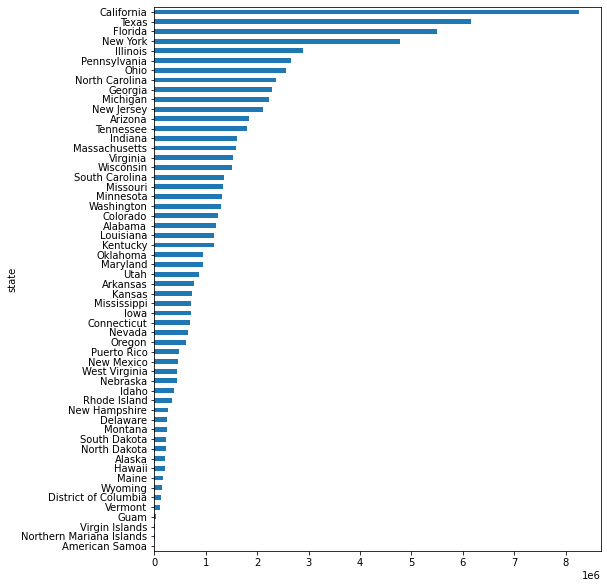

In [108]:
df.groupby('state')['cases'].sum().sort_values().plot.barh(figsize=(8,10))